In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("data.csv")
df.head()

,year,month,interest_rate,unemployment_rate,index_price
0,2017,12,2.75,5.3,1464
1,2017,11,2.50,5.3,1452
2,2017,10,2.50,5.4,1423
3,2017,9,2.25,5.5,1392
4,2017,8,2.25,5.6,1378


In [6]:
df.drop(['year',"month"],axis=1,inplace=True)

In [7]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1452
2,2.50,5.4,1423
3,2.25,5.5,1392
4,2.25,5.6,1378


In [8]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

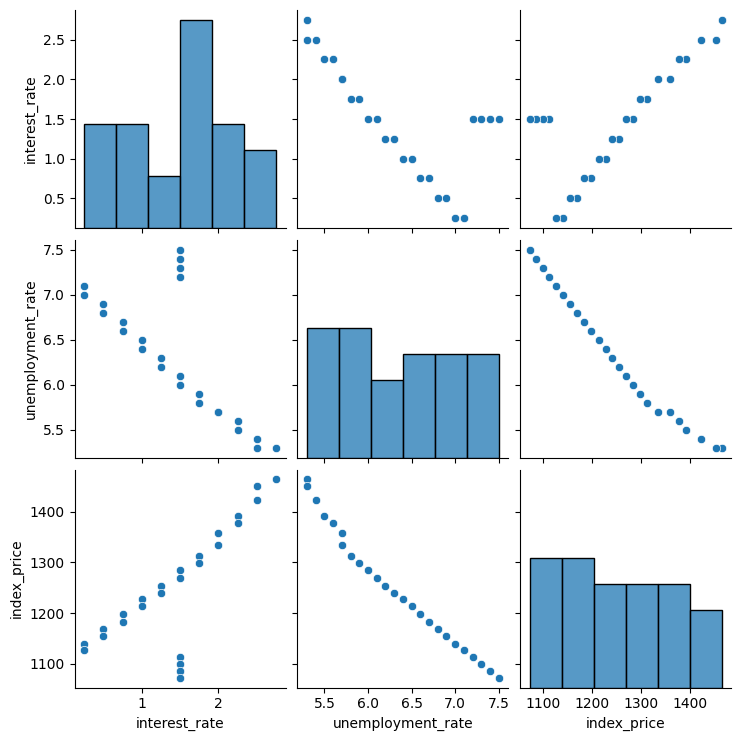

In [9]:
### data visulization
sns.pairplot(df)

In [10]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.729901,0.77615
unemployment_rate,-0.729901,1.000000,-0.98938
index_price,0.776150,-0.989380,1.00000


Text(0, 0.5, 'unemployment_rate')

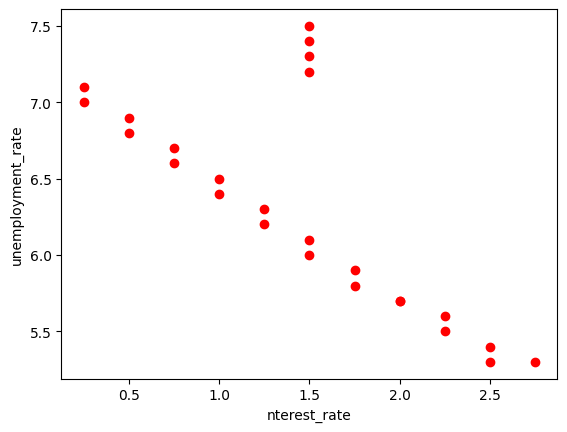

In [11]:
plt.scatter(df[['interest_rate']],df[['unemployment_rate']],color="red")
plt.xlabel("nterest_rate")
plt.ylabel("unemployment_rate")

In [12]:
X = df.iloc[:,:-1]
X

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.4
3,2.25,5.5
4,2.25,5.6
5,2.00,5.7
6,2.00,5.7
7,1.75,5.8
8,1.75,5.9
9,1.50,6.0


In [13]:
Y = df.iloc[:,-1]
Y

0     1464
1     1452
2     1423
3     1392
4     1378
5     1359
6     1335
7     1312
8     1298
9     1284
10    1269
11    1254
12    1240
13    1227
14    1213
15    1198
16    1182
17    1169
18    1155
19    1139
20    1126
21    1112
22    1099
23    1085
24    1072
Name: index_price, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

In [16]:
x_train

,interest_rate,unemployment_rate
1,2.50,5.3
22,1.50,7.3
5,2.00,5.7
2,2.50,5.4
12,1.25,6.3
15,0.75,6.6
3,2.25,5.5
4,2.25,5.6
20,0.25,7.1
17,0.50,6.8


In [17]:
import seaborn as sns

<Axes: xlabel='index_price', ylabel='unemployment_rate'>

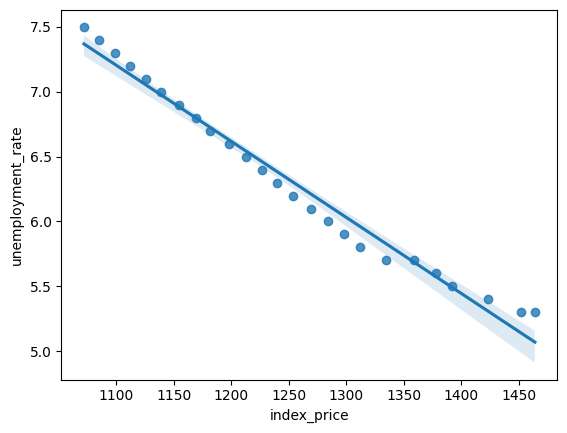

In [18]:
sns.regplot(x=df['index_price'],y=df['unemployment_rate'])

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [20]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_test

array([[ 0.4374015 , -0.63551406],
       [-0.93185537,  0.49428871],
       [ 1.80665837, -1.48286613],
       [ 0.09508728,  1.48286613],
       [-0.24722693, -0.21183802],
       [ 0.09508728, -0.49428871],
       [-0.58954115,  0.07061267]])

In [32]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [22]:
regression.fit(x_train,y_train)

LinearRegression()

In [33]:
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression,x_train,y_train,scoring="neg_mean_squared_error",cv=3)
validation_score

array([-488.38506446, -127.75425539, -434.67725901])

In [24]:
np.mean(validation_score)

np.float64(-350.2721929536029)

In [25]:
y_pred = regression.predict(x_test)
residule = y_test-y_pred
residule

8    -22.998155
16    -1.173692
0     36.176019
23    -0.050907
11   -13.585241
9    -18.041357
13    -6.129126
Name: index_price, dtype: float64

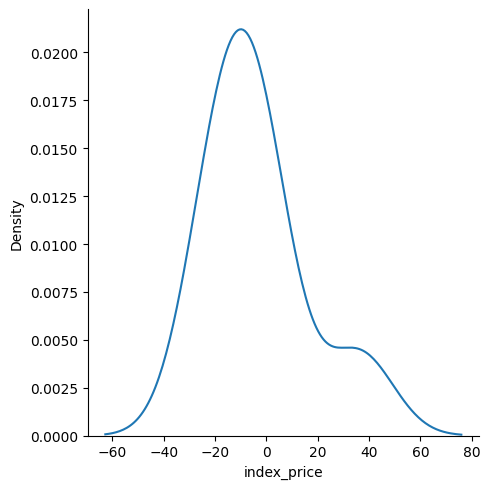

In [26]:
sns.displot(residule,kind='kde')